# Machine Learning 101
# [Part 0] Introduction

Welcome to Machine Learning 101, in this workshop we will get an introduction to some popular Machine Learning algorithms and concepts!

## What is it?
Machine learning is a subset of Artificial Intelligence that uses **data** to answer questions.

There are a set of class of questions that are impossible to solve by writing rules for them. Machine learning is an algorithm that can figure out these rules without us having to hard code everything!

Think about the way that we learn as human beings--we learn by observing and trying lots and lots of examples. Kids often copy what they see as a form of learning. The process of learning is basically:

**Input -> Process the input -> Output -> Feedback -> Input**

Think of the example of learning to write your abc's. You probably started learning by looking at many examples of the letters, processing it, and then trying your hand at writing. A teacher would then correct any letters that were incorrectly written and you would take that feedback as input to write better next time.
a
Machine Learning is inspired by Human Learning. It follows the same flow:

**Input -> Process the input -> Output -> Feedback -> Input**

The piece that processes the input is called the Machine Learning Model. The model is just an algorithm that modified itself based on the feedback! That's it!

## What will we cover?
We will experiment with some classical machine learning problems and algorithms. We will use a mix of different libraries including scikit-learn and tflearn. We will cover:
* **1. Decision Trees** -How can we classify flowers given data about their petals?
* **2. KNearest Neighbors** -Let's try another algorithm to classify flowers
* **3. Linear Regression** -Can we predict the housing prices in Boston?
* **4. Deep Neural Nets** -Making predictions for non-linear data
* **5. Convolution Nets** -Classifying handwritten digits
* **6. Autoencoders** -Generating handwritten digits

Follow along in the python notebook!

# [Part 1] Decision Trees

## [1.1] Deciding between Vistaprint Products
Let's build our first Machine Learning Model!

**The challenge:**
A Vistaprint customer comes to the site and wants to order some marketing materials--but doesn't know what she wants. How can we help her decide what product she needs(Pretend that we only sell: business cards, brochures, banners)?

### Data Collection
Machine Learning always begins with the data. Let's start with collecting relevant information.

What kind of data would be necessary to decide between these products? One example might be quantity: if you need 1000 items, you probably want business cards and not banners. What other kinds of information might you collect?

**Task:**
Break into groups and discuss what are some good features to distinguish between business cards, flyer, and banners

![Business Cards, Flyer, Banners](http://cms.cdn.vpsvc.com/-/media/vistaprint/product-images/flyers-na-images/flyers_na_gpp-2.ashx?la=en&w=767&h=767&jq=80&v=636338425300000000&sc_lang=en&hash=339641165B2D7EF7D10C8948AD8090E7CB0B8945)

Ok great! We have the following feature set:
* Quantity
* Number of words
* Price
* Size(Area)
* Product (Business Card || Flyer || Banner)

We have a table of historical data for this set of features, let's go ahead and import it:


In [25]:
# Import the dataset and extract input and output arrays
import pandas
df = pandas.read_csv("https://raw.githubusercontent.com/christinakayastha/machineLearning101/master/MachineLearning101Products.csv")
print df.head()
dataset = df.as_matrix()

# X is an array of the input data [Quantity, Number of Words, Price, Size]
X = dataset[:, :4].astype(float) 
# Y is an array of the output data [Product 0=BusinessCard, 1=Flyer, 2=Banner]
Y = dataset[:, 4:5].astype(int)

   Quantity  Words  Price  Size  Product
0      4900     18    256   7.5        0
1      2900     12    145   7.2        0
2      7100     29    358   8.8        0
3      8600     20    410   7.2        0
4      1100     15     54   8.6        0


### Train/Test split

We need to split up our data between training our model and testing it.

Think of it this way: If study for an exam by completing a set of practice problems. When the exam comes around it turns out to be the same set of questions. There's no way for your teacher to distinguish whether you just memorized the answers to those questions, or you actually learned the material.

By separating our data into train and test sets, we can make sure that we are testing our model on fresh examples that it hasn't seen yet.

Let's go ahead and split up our data:

In [26]:
from sklearn.cross_validation import train_test_split

# We are setting aside 30% of our data for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Train the Machine Learning Model

It's time to use a Machine Learning Model! For this example we will start by using a Decision Tree.

A decision tree is exactly what it sounds like. It's a classifer that has conditional nodes to decide which class the data falls into. Here's a fun example of a decision tree:

![XKCD Decision Tree](https://imgs.xkcd.com/comics/map_age_guide.png)

We are going to build a similar but automatically generated (and less complex) decision tree for deciding which product a customer should buy! Let's use the DecisionTreeClassifier that scikit learn provides:


In [27]:
from sklearn.tree import DecisionTreeClassifier

# Create a new Decision Tree Classifier
model = DecisionTreeClassifier()

# Train it on the data that we have!
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Decision Trees are great introductory models because they are easy to visualize. Let's go ahead and take a look at what our model is doing:

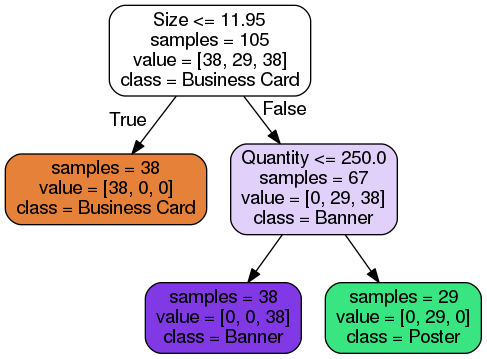

In [28]:
# This is just code to visualize the tree, don't worry about it:
def visualizeDecisionTree(clf, feature_names, class_names):
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    from sklearn.tree import export_graphviz
    import pydot
    dot_data = StringIO()
    export_graphviz(clf,
                            out_file=dot_data,
                            feature_names=feature_names,
                            class_names=class_names,
                            filled=True, rounded=True, impurity=False)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return Image(graph[0].create_png())

visualizeDecisionTree(model, ['Quantity', 'Words', 'Price', 'Size'], ['Business Card', 'Poster', 'Banner'])

The decision tree uses the input and output data in order to calculate the conditional nodes values. It starts by randomly assigning one value and classifying all of the training set. Then it calculates how many it got wrong and adjusts the weights on the nodes. It repeats this until it is able to minimize the number of predictions that are incorrect and maximize accuracy.

### Test the Model

Let's test our model on one of the test data that we set aside earlier:

In [29]:
print "Predicted: "
print model.predict(X_test[[0]])
print "Actual: "
print Y_test[0]

Predicted: 
[0]
Actual: 
[0]


Awesome! Our model got it right! Let's try this on all of the test data and calculate the accuracy:

In [30]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
print accuracy_score(Y_test, predictions)

0.977777777778


We've just built our first Machine Learning Model! Nice work!

## [1.2] Categorizing Iris

The beauty of Machine Learning algorithms is that the same models can be used for many different applications. Let's create a model to classify Iris flowers using the same approach. Scikit Learn has the data available for us to use.

**The challenge:**
Use the IRIS dataset to create a DecisionTree Model that is able to categorize the 3 different types of Iris flowers

![IRIS](http://trustmeiamadeveloper.com/content/images/2016/08/iris_types.png)


Use the hints below to get going!

In [31]:
# 1 - Import the dataset and get the input and outputs
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
Y = dataset.target

# 2 - Split the data into train/test using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 3 - Train the model
# Create a new Decision Tree Classifier
model = DecisionTreeClassifier()
# Train it on the training data
model.fit(X_train, Y_train)

# 4 - Test your model
# Make predictions using the test data
predictions = model.predict(X_test)
# Print out the accuracy_score
print accuracy_score(Y_test, predictions)

0.977777777778


Nice work! In just a few lines of code you have a highly accurate model that is able to classify IRIS flowers! Let's visualize our model:

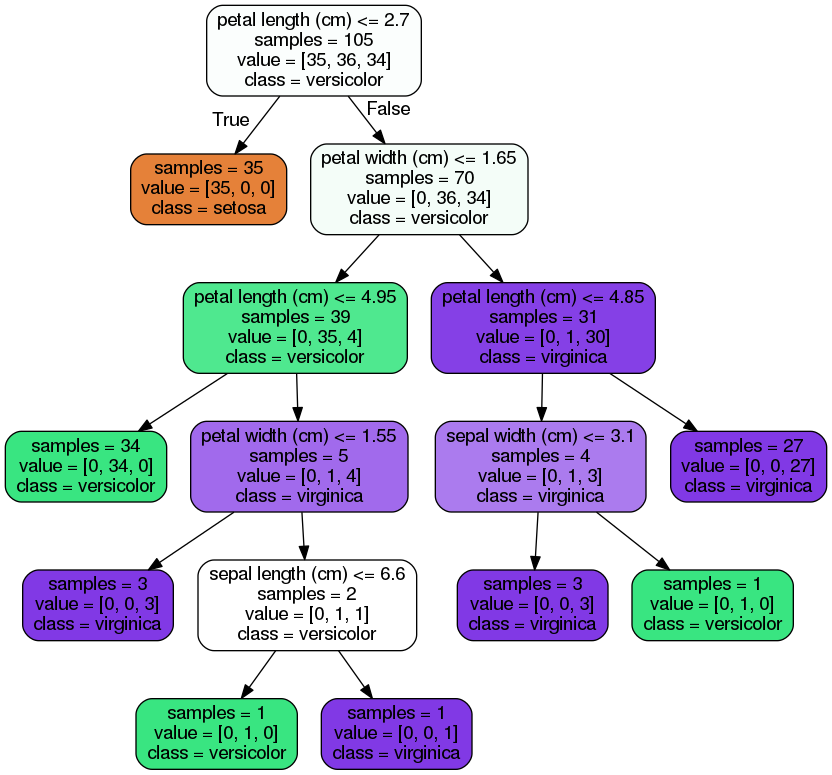

In [32]:
visualizeDecisionTree(model, dataset.feature_names, dataset.target_names)

Decision Trees can be a powerful model to classify your data. But it's important to understand that it doesn't fit all types of problems.
* Pros:
 * It's easy to interpret and explain!
 * You can have linear or non linear correlation between your parameters
 * Implicit variable screening-the nodes at the top of the tree are most important
* Cons:
 * Can be extremely sensitive to outliers/slight changes in data
 * Can easily overfit
 * Issues with data that is not in the sample

Next we will look at another classification algorithm

# [Part 2] K Nearest Neighbors

K Nearest Neighbors is another classification algorithm. Like the name suggests, K Nearest Neighbors relies on the proximity of other training data points. It measures the distance to the K nearest neighbors and it classifies itself based on which category those datapoints belong to.

![KNN example](http://en.proft.com.ua/media/science/r_knn_concept.png)

In this case if K=3 then the star is classified under ClassB, if K=6 then the star is classified under ClassA

We can use this algorithm to classify the Vistaprint Product and Iris dataset. All we have to change is the model!

## [2.1] K Nearest Neighbors for Vistaprint Products

**The Challenge**: Use KNN classification to predict what Vistaprint Product works best for the customer.

Let's go ahead and use a KNN model to classify our Vistaprint Product:


In [34]:
# 1 - Import the dataset and get the input and outputs
df = pandas.read_csv("https://raw.githubusercontent.com/christinakayastha/machineLearning101/master/MachineLearning101Products.csv")
dataset = df.as_matrix()

# X is an array of the input data [Quantity, Number of Words, Price, Size]
X = dataset[:, :4].astype(float) 
# Y is an array of the output data [Product 0=BusinessCard, 1=Flyer, 2=Banner]
Y = dataset[:, 4:5].astype(int)

# 2 - Split the data into train/test using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 3 - Train the model
# Create a new KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(2)
# Train it on the training data
model.fit(X_train, Y_train)

# 4 - Test your model
# Make predictions using the test data
predictions = model.predict(X_test)
# Print out the accuracy_score
print accuracy_score(Y_test, predictions)

0.977777777778


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Awesome! With just a few lines we're using the KNN classifier (: Let's apply it to the IRIS dataset:

## [2.1] K Nearest Neighbors for Iris dataset

**The Challenge**: Use KNN classification to predict what type of Iris it is given the petal data

Use the examples above as reference to classify the Iris dataset with KNN:

In [35]:
# 1 - Import the dataset and get the input and outputs
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
Y = dataset.target

# 2 - Split the data into train/test using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 3 - Train the model
# Create a new KNN Classifier
model = KNeighborsClassifier(2)
# Train it on the training data
model.fit(X_train, Y_train)

# 4 - Test your model
# Make predictions using the test data
predictions = model.predict(X_test)
# Print out the accuracy_score
print accuracy_score(Y_test, predictions)

0.933333333333


K Nearest Neighbors are another useful classifier for such Machine Learning Problems. Here are som pros and cons of this classifier:
* Pros:
 * Simple to implement
 * Does well in practice when it has representitive data
 * Handles Multi-class cases
* Cons:
 * Large search to find the nearest neighbor
 * Storage of data
 * Must have a meaningful distance function

# [Part 3] Linear Regression

The algorithms that we've looked at so far work for making classification predictions. For a given set of data it classifies the output into one of several buckets. There are cases when you might want to predict 

In this section, we will look at using the method of Linear Regression to predict housing prices in boston!

![HousingPriceComic](https://s-media-cache-ak0.pinimg.com/736x/31/33/22/31332204698074f453b259b72e042a03--real-estate-humor-a-house.jpg)

**The Challenge**: Can you predict the price of a house in Boston?

**Task**: Break into groups and brainstorm what kinds of features would be useful to make this prediction

Let's get started!

## [3.1] Linear Regression to Predict Housing Prices in Boston for # of rooms

We will start by trying to predict the price of a house given the number of rooms in the house.

### Import Data

As usual, the first thing we need to do is import the data. Let's take a look at what we have:

In [36]:
# 1 - Import the dataset and get the input and outputs
from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
Y = dataset.target

print(dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Let's pluck just the number of rooms for our input data for now:

In [37]:
import numpy as np
X = dataset.data[:, np.newaxis, 5]

### Split data into Train/Test

In [38]:
# 2 - Split the data into train/test using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Train the Model
We are going to use the LinearRegression model that scikit learn provides

In [39]:
# 3 - Train the model
# Create a new Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train it on the training data
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Test the Model

We can use the Mean Squared Error and Variance Score to determine how well the model performed. Because there are no buckets like there were with classification, we need to calculate the error instead.

**Root Mean Square Error**
![RMSE](http://www.statisticshowto.com/wp-content/uploads/2015/03/residual.png)

**Coefficient of Determination (R2 score)**
![R2](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/1000px-Coefficient_of_Determination.svg.png)

We can use the RMSE and R2 to determine how well our model performed

In [41]:
# 4 - Test your model
# Make predictions using the test data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
# Mean Squared Error (What was the average error in the prediction)
print "Mean Squared Error:"
print mean_squared_error(Y_test, predictions)
# Variance Score (What % of the total variation is described by the variation in x)
print "Variance Score:" 
print r2_score(Y_test, predictions)


Mean Squared Error:
36.292176507
Variance Score:
0.585006425852


### Visualising the model

Let's plot the data (Rooms x Price of house) and our prediced model to compare how it performed:

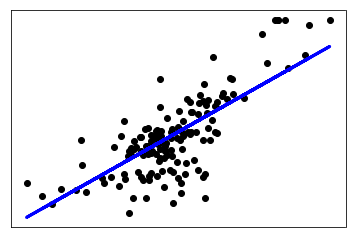

In [42]:
# Plot outputs
import matplotlib.pyplot as plt
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Nice work! We've successfully used our first Linear Regression model! Next up, let's add more variables to the equation.

## [3.2] Multivariable Linear Regression to Predict Housing Prices in Boston

In the example above we predicted the housing prices using only the number of rooms. But there are many other factors that also affect the housing price.
What good are 6 rooms if they are all tiny?

In this next section we will use all the data available and see how our model performs.


In [43]:
# 1 - Import the dataset and get the input and outputs
from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
Y = dataset.target

# 2 - Split the data into train/test using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 3 - Train the model
# Create a new Linear Regression Model
model = LinearRegression()
# Train it on the training data
model.fit(X_train, Y_train)

# 4 - Test your model
# Make predictions using the test data
predictions = model.predict(X_test)
# Mean Squared Error (What was the average error in the prediction)
print "Mean Squared Error:"
print mean_squared_error(Y_test, predictions)
# Variance Score (What % of the total variation is described by the variation in x)
print "Variance Score:" 
print r2_score(Y_test, predictions)

Mean Squared Error:
18.493668256
Variance Score:
0.75608365052


Nice! Our RMSE went down, and the Variance Score went up! Adding that extra data did help our model.

In this section we created a model that would be able to predict housing prices given some input data. 
But just as with any algorithm, the Linear Regression model has its pros and cons:
* Pros
 * Works really well for linear data
 * Easy to interpret
 * Synergestic relationships can be easily modeled
* Cons
 * Does not work if the relationship between variables is non-linear
 * More difficult to evaluate there are many variables
 * Sensitive to outliers
 
Linear Regression got us to a pretty good place for predicting housing prices. Next we will look at a Deep Neural Networks to see how we can improve this model.

# [Part 4] Deep Neural Networks

Finally! Time for some Deep Learning!!

## Introduction

Before we dive into DNNs let's model our Linear Regression model as a neural network.

In part 3.1 we predicted housing prices based on one input-the number of rooms. The visualization of our model was really just a line. You could write this as:

![y=mx+b](https://s-media-cache-ak0.pinimg.com/originals/29/1a/2e/291a2e4f4b80c2448fce4caad1c879b1.jpg)

where y is the price of the house, and x is the input of the number of rooms. The Linear Regression model learned the weight of **m** and the bias **b**.

When we added more variables, that formulat became **y = m1x1 + m2x2 + ... mnxn + b**

We can represent this with the following neural network:

![linearNeuralNet](https://cdn-images-1.medium.com/max/800/1*LlTIwE6h0l1Aoln2GlAGcw.png)

Images from awesome blog: https://medium.com/@ageitgey/machine-learning-is-fun-part-2-a26a10b68df3

That model worked assuming that the price of the house had a linear relationship with the input--what if there are more variables? One way to think about it is by creating several linear relationships to catch the edge cases:

![linearNeuralNets](https://cdn-images-1.medium.com/max/800/1*hOemQF_v42KHlMyiqcQNyQ.png)

Now that we have several price estimates for the same house based on multiple factors, we can combine them again:

![linearNeuralNetsCombined](https://cdn-images-1.medium.com/max/800/1*VeS0ziSjogCQThPYZh0TIQ.png)


Now what if we combine it all together?

![NeuralNet](https://cdn-images-1.medium.com/max/800/1*Lt8RZaeQ6f6B_eA1oD32JQ.png)

This is what a neural net is!

## Deep Neural Network

A deep neural network is simply a Neural Network that has multiple hidden layers, such as:

![DNN](https://draftin.com/images/34833?token=w5fXrfJQKt_CECpofd0YJUaAvNZEe2Qc0hgwlCj-x-48i8Bs5CtQDe52yns49AzIgK3NnSCwJvcmqQ1kp5mVwB0)

## Deep Neural Network to Predict housing prices

Let's use a DNN to predict the boston housing prices. We are going to switch now to use TensorFlow (TFLearn) since it excels in deel learning problems:

In [27]:
# 1 - Load the data
from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
Y = dataset.target.reshape(-1, 1)


# 2 - Split the data into train/test using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


# 3 - Build and Train the Model
import tflearn
import tensorflow as tf
tf.reset_default_graph()

# Build the Deep Neural Network
# There are 13 input variables
net = tflearn.input_data(shape=[None, 13])
# Create some fully connected hidden layers:
net = tflearn.fully_connected(net, 30, activation='linear')
net = tflearn.fully_connected(net, 10, activation='linear')
net = tflearn.fully_connected(net, 1, activation='linear')
# set the regression
net = tflearn.regression(net, optimizer='adam', loss='mean_square')
model = tflearn.DNN(net)

#Train the model
model.fit(X_train, Y_train, show_metric=True, validation_set=0.2, shuffle=True, n_epoch=1000)


# 4 - Test the Model
predictions = model.predict(X_test)

print "Mean Squared Error:"
print mean_squared_error(Y_test, predictions)
# Variance Score (What % of the total variation is described by the variation in x)
print "Variance Score:" 
print r2_score(Y_test, predictions)

Training Step: 4999  | total loss: 29.60685 | time: 0.011s
| Adam | epoch: 1000 | loss: 29.60685 - binary_acc: 0.0000 -- iter: 256/283
Training Step: 5000  | total loss: 28.70113 | time: 1.017s
| Adam | epoch: 1000 | loss: 28.70113 - binary_acc: 0.0000 | val_loss: 39.30858 - val_acc: 0.0000 -- iter: 283/283
--
Mean Squared Error:
19.7904536664
Variance Score:
0.729323249159


Awesome! We build our first DNN! Go ahead and play around with the values to see if you can improve the variance score. The art of feature engineering is architecting the Neural Network layers.

Also checkout the Neural Network playground: http://playground.tensorflow.org

DNNs seem really amazing, but they have their pros and cons:
* Pros
 * The idea has been around for many years, a lot of research
 * Can solve dificult problems
* Cons
 * Very difficult to visualize and understand
 * Takes up a lot of processing power

Next we will look at Convolutional Neural Netowrks which are a type of DNN


# [Part 5] Convolutional Neural Networks MNIST

We've come a long way from building our first machine learning algorigthm to building our first DNN. Next let's look at Convolutional Neural Networks.

A CNN is a type of DNN that is particularly useful for solving problems where input nodes are spacially related. A great example of this is for classifying images. In this section we will classify handwritten MNIST digits using a CNN.

## Introduction
**The Challenge**: Given a picture of a handwritten digit can you classify it as the correct number?

![MNIST](http://simonwinder.com/wp-content/uploads/2015/07/mnistExamples.png)
 
Mnist is a large corpus of human-labeled handwritten digits. It's the 'Hello World' of Machine Learning.
 
![MNIST](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)
 
Let's start by representing our data in a format that the computer can understand, in tensors (just matrices!)
 
![MNIST](https://www.tensorflow.org/images/MNIST-Matrix.png)

We can use each pixel as an input into our model:
 
![MNIST](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/d5222c6e3d15770a.png)

Let's go ahead and look at some examples of the data: 

In [44]:
# Import the dataset
from tflearn.datasets import mnist
X_train, Y_train, X_test, Y_test = mnist.load_data()

Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz
Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [45]:
# Three are 55k examples in trail and 10k in test.
# Let's limit the size to make this run faster
max_examples = 10000
X_train = X_train[:max_examples]
Y_train = Y_train[:max_examples]

In [46]:
# Let's display some digits
import matplotlib.pyplot as plt
%matplotlib inline
def display(i):
    img = X_test[i]
    plt.title('Example %d. Label: %d' % (i, Y_test[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

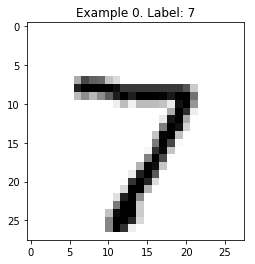

In [47]:
display(0)

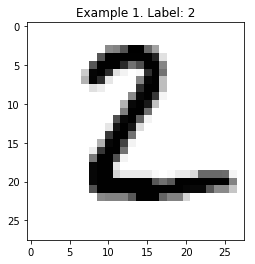

In [48]:
display(1)

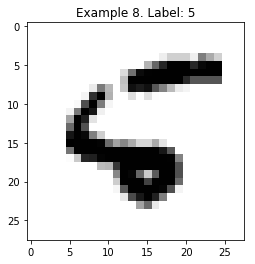

In [49]:
display(8)

Before we dive into CNNs--can you think of other algorithms that we can use to classify MNIST digits?

## Other Algorithms to classify MNIST digits

Here are some examples of how you can use the other algorithms we learned to classify this data. Just treat it as an array of 784 inputs!

### Decision Tree

In [51]:
# 3 - Train the model
# Create a new Decision Tree Classifier
model = DecisionTreeClassifier()
# Train it on the training data
model.fit(X_train, Y_train)

# 4 - Test your model
# Make predictions using the test data
predictions = model.predict(X_test)
# Print out the accuracy_score
print accuracy_score(Y_test, predictions)

0.813


### K Nearest Neighbor

In [52]:
# 3 - Train the model
# Create a new KNN Classifier
model = KNeighborsClassifier(2)
# Train it on the training data
model.fit(X_train, Y_train)

# 4 - Test your model
# Make predictions using the test data
predictions = model.predict(X_test)
# Print out the accuracy_score
print accuracy_score(Y_test, predictions)

0.9358


### Linear Regression

In [46]:
# 3 - Train the model
# Create a new Linear Regression Model
model = LinearRegression()
# Train it on the training data
model.fit(X_train, Y_train)

# 4 - Test your model
# Make predictions using the test data
predictions = model.predict(X_test)
# Mean Squared Error (What was the average error in the prediction)
print "Mean Squared Error:"
print mean_squared_error(Y_test, predictions)
# Variance Score (What % of the total variation is described by the variation in x)
print "Variance Score:" 
print r2_score(Y_test, predictions)

Mean Squared Error:
3.82050507424e+20
Variance Score:
-4.55624993591e+19


### Deep Neural Network

In [51]:
# 3 - Build and Train the Model
import tflearn
import tensorflow as tf
tf.reset_default_graph()

# Build the Deep Neural Network
# There are 784 input variables
net = tflearn.input_data(shape=[None, 784])
# Create some fully connected hidden layers:
net = tflearn.fully_connected(net, 30, activation='linear')
net = tflearn.fully_connected(net, 10, activation='linear')
net = tflearn.fully_connected(net, 1, activation='linear')
# set the regression
net = tflearn.regression(net, optimizer='adam', loss='mean_square')
model = tflearn.DNN(net)

#Train the model
model.fit(X_train, Y_train.reshape(-1, 1), show_metric=True, validation_set=0.2, shuffle=True, n_epoch=500)


# 4 - Test the Model
predictions = model.predict(X_test)

print "Mean Squared Error:"
print mean_squared_error(Y_test, predictions)
# Variance Score (What % of the total variation is described by the variation in x)
print "Variance Score:" 
print r2_score(Y_test, predictions)

Training Step: 62499  | total loss: 3.07202 | time: 0.415s
| Adam | epoch: 500 | loss: 3.07202 - binary_acc: 0.1249 -- iter: 7936/8000
Training Step: 62500  | total loss: 3.01285 | time: 0.444s
| Adam | epoch: 500 | loss: 3.01285 - binary_acc: 0.1234 | val_loss: 3.64580 - val_acc: 0.1365 -- iter: 8000/8000
--
Mean Squared Error:
3.42158
Variance Score:
0.59195018115


Were the results as you expected them to be? What surprised you? What did you expect?

## MNIST CNN

This is what a Convolutional Neural net typically looks like:

![CNN](https://www.kernix.com/doc/data/cnn.png)

There are two main parts to a CNN, the feature extraction and then the classification

Each layer of the CNN is composed of 3 building blocks: Convolution, Relu, Pooling/

### Convolution
![Convolution](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/more_images/Convolution_schematic.gif)
![Convolution](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/assets/ezgif.com-optimize.gif)
![Convolution](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/Images/Conv2dUsage1.png)

### Pooling
![Pooling](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_4/Pooling_Simple_max.png)
![Pooling](https://ujwlkarn.files.wordpress.com/2016/08/conv_all.png?w=748)

### CNN
![CNN](http://cs231n.github.io/assets/cnn/convnet.jpeg)

## Let's Write some Code!

In [56]:
import tensorflow as tf
tf.reset_default_graph()

# Data loading and preprocessing
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)
X = X.reshape([-1, 28, 28, 1])
testX = testX.reshape([-1, 28, 28, 1])

# Building convolutional network
network = input_data(shape=[None, 28, 28, 1], name='input')
network = conv_2d(network, 32, 3, activation='relu', regularizer="L2")
network = max_pool_2d(network, 2)
network = local_response_normalization(network)
network = conv_2d(network, 64, 3, activation='relu', regularizer="L2")
network = max_pool_2d(network, 2)
network = local_response_normalization(network)
network = fully_connected(network, 128, activation='tanh')
network = dropout(network, 0.8)
network = fully_connected(network, 256, activation='tanh')
network = dropout(network, 0.8)
network = fully_connected(network, 10, activation='softmax') 
network = regression(network, optimizer='adam', learning_rate=0.01,
                     loss='categorical_crossentropy', name='target')

# Training
model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit({'input': X}, {'target': Y}, n_epoch=20,
           validation_set=({'input': testX}, {'target': testY}),
           snapshot_step=100, show_metric=True, run_id='convnet_mnist')


Training Step: 17199  | total loss: 0.24194 | time: 39.077s
| Adam | epoch: 020 | loss: 0.24194 - acc: 0.9413 -- iter: 54976/55000
Training Step: 17200  | total loss: 0.27632 | time: 40.879s
| Adam | epoch: 020 | loss: 0.27632 - acc: 0.9378 | val_loss: 0.14567 - val_acc: 0.9655 -- iter: 55000/55000
--


Play around with the number of convolution and pooling layers in the network and see how the results change!

# [Part 6] [Bonus] Generating MNIST Digits

If you're done early, play around with this auto encoding script that generates MNIST digits!

Training Step: 4299  | total loss: 0.01314 | time: 1.791s
| Adam | epoch: 020 | loss: 0.01314 -- iter: 54784/55000
Training Step: 4300  | total loss: 0.01276 | time: 2.805s
| Adam | epoch: 020 | loss: 0.01276 | val_loss: 0.00899 -- iter: 55000/55000
--

Test encoding of X[0]:
[[ 6.35219097 -2.89837432  3.49386048  0.47680086 -2.51717806 -1.79669309
  -3.42561221 -2.52909184  4.63808823  2.46789455  1.59266269  1.37564921
   0.91805208 -3.84801817  2.40321016  0.56829715  2.66339803 -6.91068506
  -0.60677105  0.0625391   2.59428334 -3.5231154  -1.26462078 -2.0205853
   4.73546505  1.21826148  2.83536863 -1.47871363 -1.9900682  -3.504251
   2.67819095  2.89793682  2.11700535 -0.28561869  1.56345737  1.30714965
  -0.97851229  1.6556052  -1.99147344 -0.79651517 -0.50185162  0.5128516
   0.16291207  0.68023157  0.01222834 -1.79204726 -6.01369667  2.47671962
  -0.44349712  2.12721896  2.0419476  -1.22244513 -3.94676399 -2.15452409
   4.90154123 -3.19830084 -0.25192302  2.15521908 -0.51592541

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


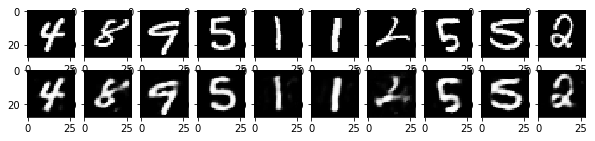

In [57]:
tf.reset_default_graph()

import numpy as np
import matplotlib.pyplot as plt
import tflearn

# Data loading and preprocessing
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)

# Building the encoder
encoder = tflearn.input_data(shape=[None, 784])
encoder = tflearn.fully_connected(encoder, 256)
encoder = tflearn.fully_connected(encoder, 64)

# Building the decoder
decoder = tflearn.fully_connected(encoder, 256)
decoder = tflearn.fully_connected(decoder, 784, activation='sigmoid')

# Regression, with mean square error
net = tflearn.regression(decoder, optimizer='adam', learning_rate=0.001,
                         loss='mean_square', metric=None)

# Training the auto encoder
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(X, X, n_epoch=20, validation_set=(testX, testX),
          run_id="auto_encoder", batch_size=256)

# Encoding X[0] for test
print("\nTest encoding of X[0]:")
# New model, re-using the same session, for weights sharing
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))

# Testing the image reconstruction on new data (test set)
print("\nVisualizing results after being encoded and decoded:")
testX = tflearn.data_utils.shuffle(testX)[0]
# Applying encode and decode over test set
encode_decode = model.predict(testX)
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    temp = [[ii, ii, ii] for ii in list(testX[i])]
    a[0][i].imshow(np.reshape(temp, (28, 28, 3)))
    temp = [[ii, ii, ii] for ii in list(encode_decode[i])]
    a[1][i].imshow(np.reshape(temp, (28, 28, 3)))
f.show()
plt.draw()